Input shape (X): (50000, 1685)
Target shape (y): (50000, 1)

Input dimension: 1685


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     1,726,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,785 (9.24 MB)

 Trainable params: 2,419,201 (9.23 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 2.2992 - mae: 0.7425 - val_loss: 1.5744 - val_mae: 0.6876 - learning_rate: 0.0010
Epoch 2/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 1.1467 - mae: 0.4677 - val_loss: 1.0432 - val_mae: 0.6242 - learning_rate: 0.0010
Epoch 3/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 0.7357 - mae: 0.4334 - val_loss: 0.7325 - val_mae: 0.5604 - learning_rate: 0.0010
Epoch 4/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.5516 - mae: 0.4119 - val_loss: 0.7730 - val_mae: 0.6150 - learning_rate: 0.0010
Epoch 5/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.4841 - mae: 0.3991 - val_loss: 0.5736 - val_mae: 0.4944 - learning_rate: 0.0010
Epoch 6/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 0.4908 - mae: 0.4069 - val_loss: 0.8450 - val_mae: 0.6399 - learning_rate: 0.0010
Epoch 7/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 0.4824 - mae: 0.4027 - val_loss: 0.7393 - val_mae: 0.

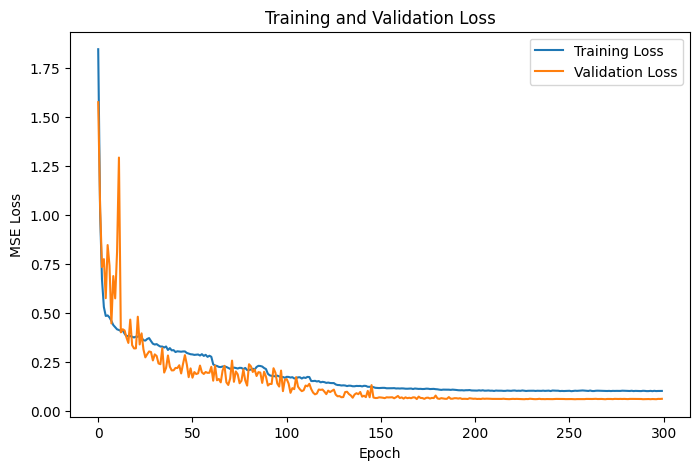

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Overall Percentage Errors:
KP: 9.36%


In [2]:
# Cell 1: Data Preparation with W and L as Inputs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MOSFET parameter and measurement data
params_df = pd.read_csv('mosfet_params_v9.csv')
measurements_df = pd.read_csv('measurements_v9.csv')

# Group measurements and prepare input features
X_list = []
mosfet_ids = []

grouped = measurements_df.groupby('MOSFET_ID')
for mosfet_id, group in grouped:
    group_sorted = group.sort_values('meas_index')
    if len(group_sorted) == 561:
        measurement_features = group_sorted[['VGS', 'VDS', 'ID']].values.flatten()
        W = params_df.loc[params_df['MOSFET_ID'] == mosfet_id, 'W'].values[0]
        L = params_df.loc[params_df['MOSFET_ID'] == mosfet_id, 'L'].values[0]
        features = np.concatenate([measurement_features, [W, L]])
        X_list.append(features)
        mosfet_ids.append(mosfet_id)

X = np.array(X_list)

# Prepare target (KP) with log transformation
params_df.set_index('MOSFET_ID', inplace=True)
y_list = []
for mosfet_id in mosfet_ids:
    kp = params_df.loc[mosfet_id, 'KP']
    y_list.append(np.log1p(kp))
y = np.array(y_list).reshape(-1, 1)

print("Input shape (X):", X.shape)
print("Target shape (y):", y.shape)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the inputs and outputs
input_scaler = StandardScaler()
X_train_scaled = input_scaler.fit_transform(X_train)
X_test_scaled = input_scaler.transform(X_test)

output_scaler = StandardScaler()
y_train_scaled = output_scaler.fit_transform(y_train)
y_test_scaled = output_scaler.transform(y_test)

# Cell 2: Clear Previous Model
import tensorflow as tf
from tensorflow.keras import backend as K

K.clear_session()
tf.random.set_seed(42)

# Cell 3: Enhanced Model Definition with Fixed Learning Rate
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train_scaled.shape[1]
print("Input dimension:", input_dim)

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Use a fixed learning rate compatible with ReduceLROnPlateau
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# Cell 4: Model Training with Early Stopping and Learning Rate Reduction
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Cell 5: Plotting Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Cell 6: Evaluation with Inverse Transformation
predictions_scaled = model.predict(X_test_scaled)
predictions = np.expm1(output_scaler.inverse_transform(predictions_scaled))
y_test_original = np.expm1(output_scaler.inverse_transform(y_test_scaled))

epsilon = 1e-10
percentage_errors = np.abs((predictions - y_test_original) / (y_test_original + epsilon)) * 100
mean_percentage_errors = np.mean(percentage_errors, axis=0)

parameter_names = ["KP"]
print("\nOverall Percentage Errors:")
for i, param in enumerate(parameter_names):
    print(f"{param}: {mean_percentage_errors[i]:.2f}%")

In [3]:
# Cell 7: Save the Model
model.save('mosfet_kp_model_v2.keras')

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

# Compute performance metrics
r2 = r2_score(y_test_original, predictions)
mse = mean_squared_error(y_test_original, predictions)
rmse = root_mean_squared_error(y_test_original, predictions)

# Print results in scientific notation
print(f"R² Score: {r2:.4f}")  # R² typically doesn't need scientific notation
print(f"MSE: {mse:.4e}")   # Scientific notation with 4 decimal places
print(f"RMSE: {rmse:.4e}") # Scientific notation with 4 decimal places

R² Score: 0.9632
MSE: 6.2052e-10
RMSE: 2.4910e-05
